In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data

SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.


done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4488579
done creating unique IDs for brick file
done identifying LRGs in survey brick
631147
done making survey cuts
done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4076998
done creating unique IDs for brick file
done identifying LRGs in survey brick
249137
done making survey cuts
end readdata


In [23]:
# calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)

print(len(zmag_LRG_nocuts))

# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
  
    
# zmag_cut_test = np.concatenate([zmag_LRG_nocuts, zmag_BKG])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1

ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# cut for zmag brighter than 22.36

ra_LRG_temp = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
dec_LRG_temp = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
id_LRG_temp = id_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
z_LRG_temp = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
gmag_LRG_temp = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rmag_LRG_temp = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
zmag_LRG_temp = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
grcolor_LRG_temp = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rzcolor_LRG_temp = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + z_LRG_temp)**-1.)
# Mz = zmag_LRG_temp - DM_arr - K_correct
# Lz = 10.**((Mz-Msun_z)/(-2.5))
# log_Lz = np.log10(Lz)

ra_LRG = ra_LRG_temp #[np.where(log_Lz > 10.5)]
dec_LRG = dec_LRG_temp # [np.where(log_Lz > 10.5)]
id_LRG = id_LRG_temp # [np.where(log_Lz > 10.5)]
z_LRG = z_LRG_temp # [np.where(log_Lz > 10.5)]

# plate_LRG = plate_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
# fiberid_LRG = fiberid_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

gmag_LRG = gmag_LRG_temp # [np.where(log_Lz > 10.5)]
rmag_LRG = rmag_LRG_temp # [np.where(log_Lz > 10.5)]
zmag_LRG = zmag_LRG_temp # [np.where(log_Lz > 10.5)]
grcolor_LRG = grcolor_LRG_temp # [np.where(log_Lz > 10.5)]
rzcolor_LRG = rzcolor_LRG_temp# [np.where(log_Lz > 10.5)]

ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
print(len(ra_BKG))
print(len(ra))

2037
1823
517525
519348


In [24]:
index = np.random.randint(0, len(ra), size=2000)
print(index)

[427827 197649 102917 ... 183736  95751  47681]


In [25]:
# make a random data set that I will treat as LRGs
random_ra = ra[index]
random_dec = dec[index]
random_gmag = gmag[index]
random_rmag = rmag[index]
random_zmag = zmag[index]
random_grcolor = grcolor[index]
random_rzcolor = rzcolor[index]

# assign random LRGs to a redshift bin
random_z_low = np.random.uniform(low=0.2, high=0.3, size=2000)
random_z_mid1 = np.random.uniform(low=0.2, high=04., size=2000)
random_z_mid2 = np.random.uniform(low=0.2, high=0.5, size=2000)
random_z_mid3 = np.random.uniform(low=0.2, high=0.6, size=2000)
random_z_high = np.random.uniform(low=0.2, high=0.65, size=2000)
print(len(random_z))
print(random_z)

2000
[0.20110491 0.25526128 0.27083451 ... 0.22811247 0.22141227 0.24732201]


In [26]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(random_z)

print("end cosmoCalc")

end cosmoCalc


In [27]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

# rzinit = -1.8027077
# rzfin = 10.44729232788086
# rz_interval = 0.5
# rz_num = (rzfin-rzinit)/rz_interval
# rz_edges, step = np.linspace(rzinit, rzfin, num=int(rz_num), retstep=True)
# print(len(rz_edges))

# grinit = -6.5846786
# grfin = 10.56532135009765
# gr_interval = 0.5
# gr_num = (grfin-grinit)/gr_interval
# gr_edges, step = np.linspace(grinit, grfin, num=int(gr_num), retstep=True)
# print(len(gr_edges))

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))


H1, nouse_edges = np.histogramdd((random_rzcolor, random_grcolor, random_zmag), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>


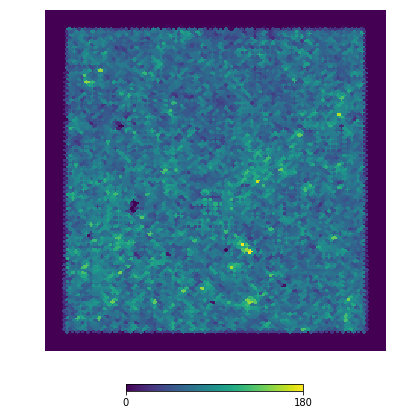

length phi:  519348


In [28]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [29]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_ra, random_dec, ra_BKG, dec_BKG, random_zmag, zmag_BKG, random_rzcolor, rzcolor_BKG, random_grcolor, grcolor_BKG, nouse_edges)

print('end nearNeighbor')



end nearNeighbor


In [31]:
# totalNear(near)

# plt.show()

In [32]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, random_ra, random_dec, pixnums, zmag, rzcolor, grcolor, nouse_edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")

end bkg


mean number of interlopers is 74.64660281905677
median number of interlopers is 73.9217443235368
standard deviation of interloper is 21.26890273076483
standard error is 0.47570606451387115


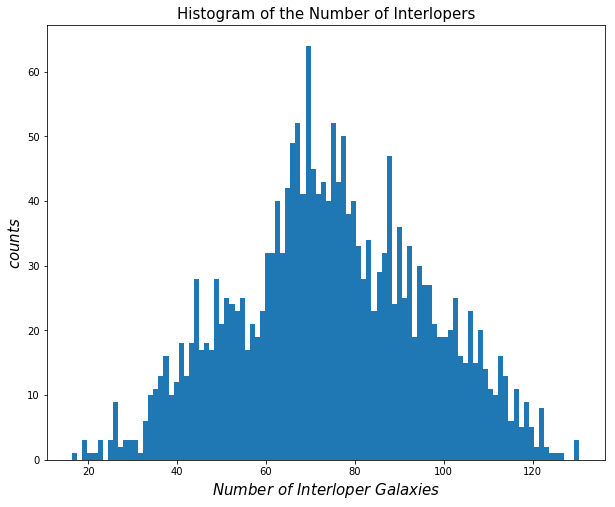

In [33]:
totalNbkg(Nbkg)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nbkg_random_hist.pdf')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nbkg_hist.pdf')

plt.show()

Nbkg = np.array(Nbkg)

In [34]:
Nsat = np.array(near) - np.array(Nbkg)

print(Nsat[0].shape)
print("end Nsat")

(49, 49, 49)
end Nsat


mean number of satellites is 13.661897180943226
median number of satellites is 10.92703053166301
standard deviation of satellites is 24.530160722954623
standard error is 0.5486482479667564


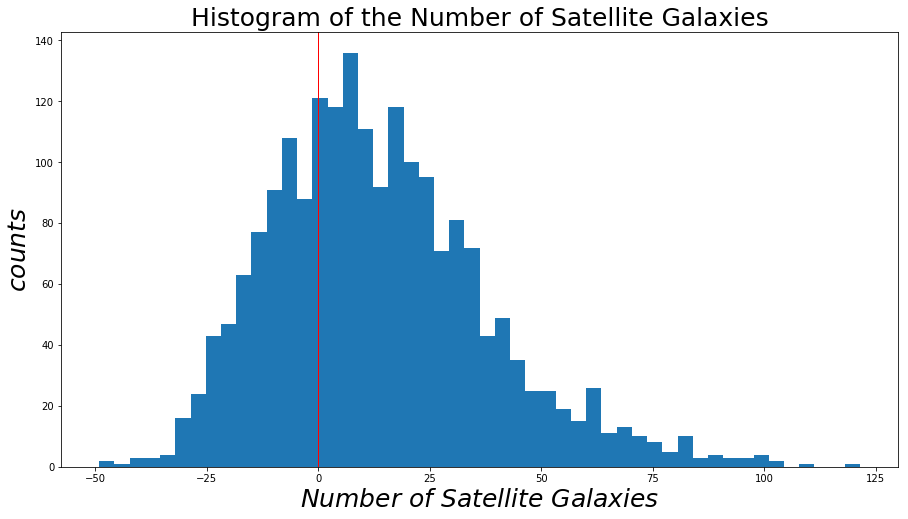

In [36]:
from lrg_plot_functions import *

totalNsat(Nsat)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nsat_random_hist.pdf')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/20Aug2020/Nsat_hist.pdf')

plt.show()

In [37]:
# read in selection matrices for each luminosity selected sample 

data_smatrix03 = np.load('/Users/mtownsend/Desktop/lowz_smatrix-2matrices.npz')
smatrix03 = data_smatrix03['smatrix_low']
print(smatrix03.shape)

data_smatrix04 = np.load('/Users/mtownsend/Desktop/midz1_smatrix-4matrices.npz')
smatrix04 = data_smatrix04['smatrix_low']
print(smatrix04.shape)

data_smatrix05 = np.load('/Users/mtownsend/Desktop/midz2_smatrix-6matrices.npz')
smatrix05 = data_smatrix05['smatrix_low']
print(smatrix05.shape)

data_smatrix06 = np.load('/Users/mtownsend/Desktop/midz3_smatrix-8matrices.npz')
smatrix06 = data_smatrix06['smatrix_low']
print(smatrix06.shape)

data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
smatrix65 = data_smatrix65['smatrix_low']
print(smatrix65.shape)


(2, 49, 49, 49)
(4, 49, 49, 49)
(6, 49, 49, 49)
(8, 49, 49, 49)
(9, 49, 49, 49)


In [43]:
Nsat25 = Nsat[np.where((z_LRG >= 0.2) & (z_LRG < 0.25))]
Nsat03 = Nsat[np.where((z_LRG >= 0.25) & (z_LRG < 0.3))]

print(len(Nsat25))
print(len(Nsat03))

zinit = 0.2
zfin = 0.65
interval = 0.05
# num = (zfin-zinit)/interval
num = 10. 
zrange, step = np.linspace(zinit, zfin, num=int(num), retstep=True)

90
83


In [44]:
# make new Nsat for log(lum)=9.55; 0.2 < z < 0.3

# 0.2 < z < 0.25
lowz_newNsat25 = []
for i in range(len(Nsat25)):
    lowz_newNsat25.append(Nsat25[i] * smatrix03[0])
    
# 0.25 < z < 0.3
lowz_newNsat03 = []
for i in range(len(Nsat03)):
    lowz_newNsat03.append(Nsat03[i] * smatrix03[1])

print(np.asarray(lowz_newNsat25).shape)
print(np.asarray(lowz_newNsat03).shape)

(90, 49, 49, 49)
(83, 49, 49, 49)


In [45]:
def totalNsat(Nsat, lum, z1, z2):

    import matplotlib.pylab as plt 	
    import numpy as np
    from scipy import stats
    
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height


    sumsat = []

    # Sum up number of satellite galaxies for every LRG
    for i in range(len(Nsat)):
        sumsat.append(np.sum(Nsat[i]))

    meansat = np.mean(sumsat)
    print("mean number of satellites is", meansat)
    
    mediansat = np.median(sumsat)
    print("median number of satellites is", mediansat)

    sdsat = np.std(sumsat)
    print("standard deviation of satellites is", sdsat)

    sterr = stats.sem(sumsat)
    print("standard error is", sterr)

    plt.rcParams["figure.figsize"] = [15, 8]
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)=10.36; 0.55 < z < 0.6", fontsize=25)
    plt.title("Histogram of the Number of Satellite Galaxies; log(lum)={}; {} < z < {}".format(lum, z1, z2), fontsize=20)
    plt.hist(sumsat, bins=50)
    plt.axvline(linewidth=1, color='r')
    plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=25)
    plt.ylabel(r'$counts$', fontsize=25)
    plt.text(top, right,'mean = {}'.format(meansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    plt.text(top, right-0.05,'median = {}'.format(mediansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    plt.text(top, right-0.1,'stdev = {}'.format(sdsat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    # plt.show()
    return(mediansat)

mean number of satellites is 0.10152705553506283
median number of satellites is -0.281199501811571
standard deviation of satellites is 1.0223456117744354
standard error is 0.10836841811147066


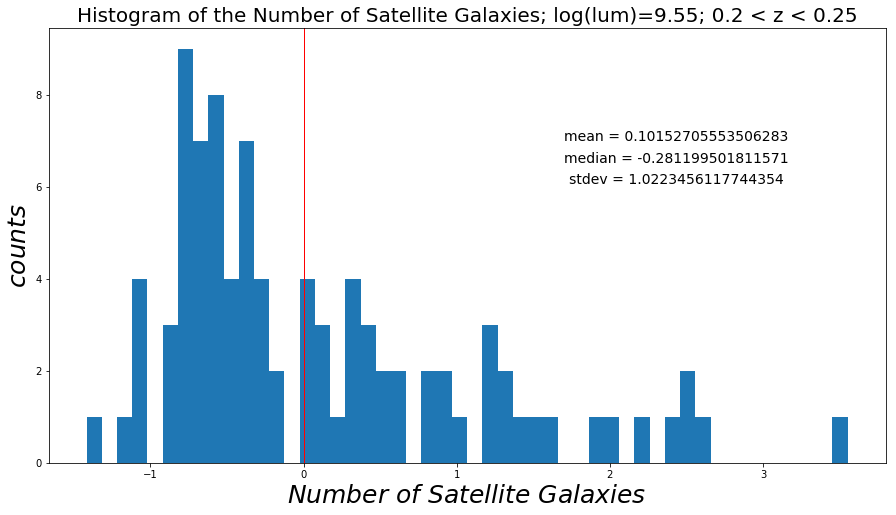

mean number of satellites is -0.18551153488117125
median number of satellites is -0.6053518711249666
standard deviation of satellites is 1.6823671282949508
standard error is 0.18578636939576856


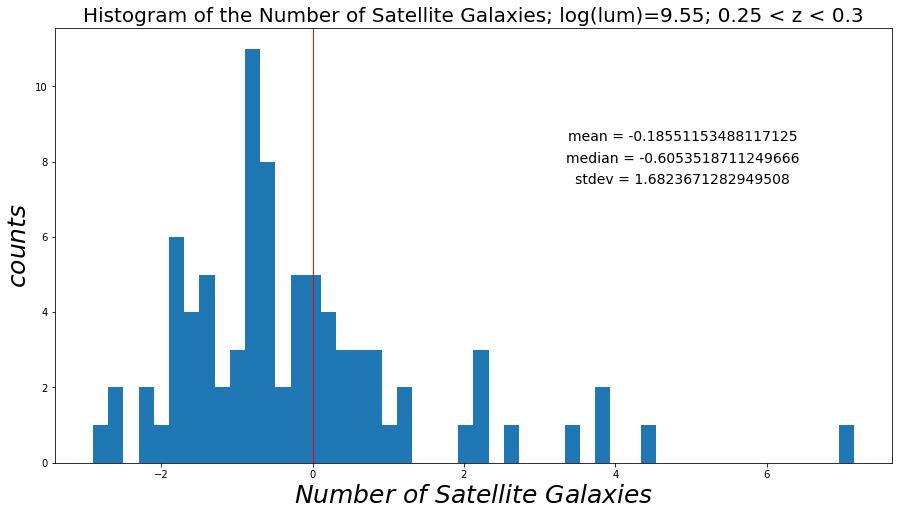

In [46]:
totalNsat(lowz_newNsat25, 9.55, round(zrange[0], 2), round(zrange[1], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/11Sept2020/lowz_random_maskedNsat25.pdf')
plt.show()

totalNsat(lowz_newNsat03, 9.55, round(zrange[1], 2), round(zrange[2], 2))

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/11Sept2020/lowz_random_maskedNsat03.pdf')
plt.show()